# Hierarchial Clustering

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv('../data/cluster_mpg.csv')

In [13]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
388,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
389,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
390,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


<AxesSubplot: xlabel='origin', ylabel='count'>

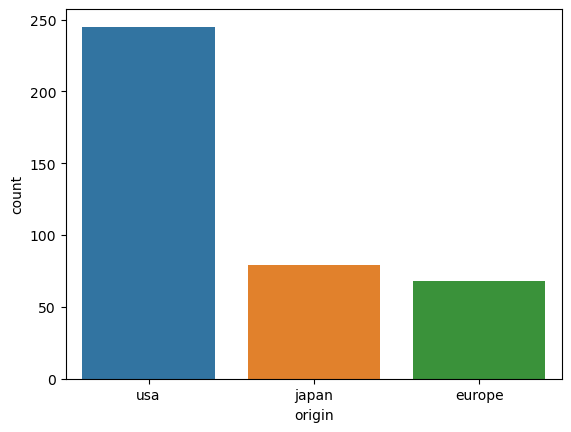

In [14]:
sns.countplot(df,x='origin')

<AxesSubplot: xlabel='mpg', ylabel='horsepower'>

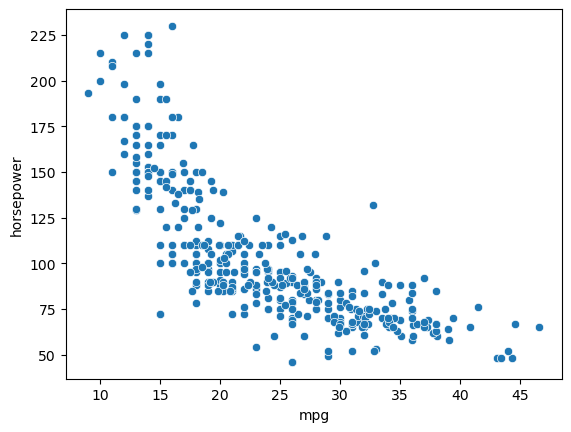

In [15]:
sns.scatterplot(df,x='mpg',y='horsepower')

<AxesSubplot: xlabel='cylinders', ylabel='horsepower'>

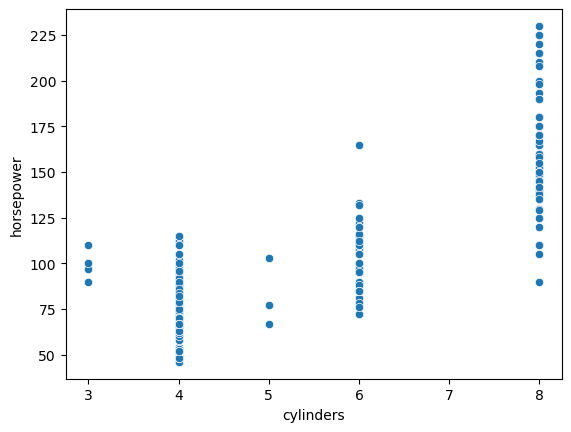

In [16]:
sns.scatterplot(df,x='cylinders',y='horsepower')

### removal of outliers

In [17]:
def remove_outliers(df,name,sd):
    drop_rows=df.index[(np.abs(df[name]-df[name].mean())>=(sd*df[name].std()))]
    df.drop(drop_rows,axis=0,inplace=True)

In [18]:
remove_outliers(df,'mpg',2)

In [19]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
386,27.0,4,151.0,90.0,2950,17.3,82,usa,chevrolet camaro
387,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
389,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
390,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler=MinMaxScaler()

In [22]:
x=pd.get_dummies(df,drop_first=True)

In [23]:
scaled_x=scaler.fit_transform(x)

In [24]:
scaled_df=pd.DataFrame(data=scaled_x,columns=x.columns)

In [26]:
scaled_df['mpg'].argmax()

331

In [27]:
scaled_df['mpg'].argmin()

28

In [30]:
a=scaled_df.iloc[331]
b=scaled_df.iloc[28]

In [31]:
np.linalg.norm(a-b)

2.441495595495106

### Agglomerative clustering is a hierarchical clustering technique used to group together similar objects or data points based on their distances.



In [32]:
from sklearn.cluster import AgglomerativeClustering

### In agglomerative clustering, each data point initially starts as its own cluster. Then, the algorithm progressively merges the two closest clusters until all the data points are in a single cluster. The distance between two clusters is typically defined as the distance between their closest or furthest data points.

In [33]:
agg=AgglomerativeClustering(n_clusters=None,distance_threshold=2)

In [34]:
agg.fit(scaled_df)

AgglomerativeClustering(distance_threshold=2, n_clusters=None)

In [36]:
from scipy.cluster import hierarchy

In [37]:
from scipy.cluster.hierarchy import dendrogram

In [39]:
linkage=hierarchy.linkage(agg.children_)

### Agglomerative clustering can be represented using a dendrogram, which is a tree-like diagram that shows the hierarchical relationships between clusters. The height of the dendrogram at each point represents the distance between the clusters being merged.

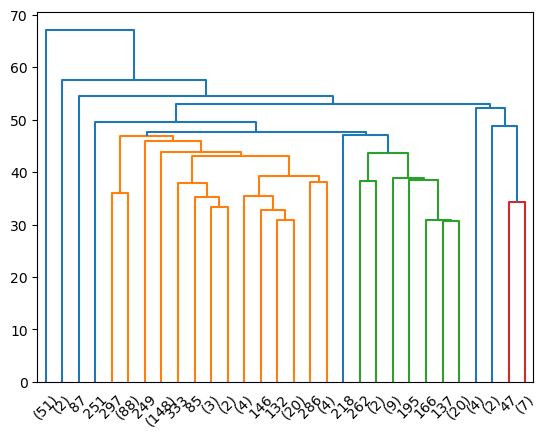

In [42]:
dendrogram(linkage,truncate_mode='lastp',p=30);